In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./data/churn_dataset.csv')

In [3]:
df.head().T[30:]

,0,1,2,3,4
Desktop Web,0,1,0,0,0
Mobile Web,0,0,0,0,0
iOS,0,0,0,0,2
NA,2,1,1,1,0
last_order_software_type,NaN,Desktop Web,NaN,NaN,iOS
first_order_software_type,NaN,NaN,NaN,NaN,iOS
product_LA,0,2,0,0,0
product_HH,0,0,0,0,0
product_DC,0,2,0,0,0
product_WF,0,0,0,0,0


In [4]:
df_cluster = pd.read_csv('data/clustered_customers.csv')
df_cluster.head()

,Unnamed: 0,customer_db_id,Accessories,BUS_Blazer,BUS_Blouse,BUS_Dress,BUS_Evening Dress,BUS_Shirt,BUS_Skirt,BUS_Suit,...,HH_towels,OUT_Jackets + Coats,OUT_Skiwear,Others,WashFold,cluster,cluster_name,frequency,freq_mean,freq_median
0,0,54478fa4d3cde8d17ca5e4db,0,1,0,0,0,1,0,0,...,0,0,0,0,0,2,Shirt,0.000,70.986182,37.0
1,1,545b9a8bd2cde8871f009f9b,0,0,0,0,0,1,0,0,...,0,0,0,0,0,2,Shirt,103.625,70.986182,37.0
2,2,546b0317d4cde899738b81b0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,2,Shirt,416.000,70.986182,37.0
3,3,546c7131d4cde8a747fe23b0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,2,Shirt,673.000,70.986182,37.0
4,4,5470c6cfd2cde8a969d236ec,0,0,0,0,0,1,0,0,...,0,0,0,0,0,2,Shirt,86.000,70.986182,37.0


In [5]:
df = df.merge(df_cluster, on='customer_db_id')

In [6]:
df.customer_db_id.nunique()

55588

# Customers with bad experience

In [7]:
bad_exp_some = ((df.reclean_orders >= 1) |
    (df.avg_rating < 4) |
    (df.refunds_success >= 1) |
    (df.internal_reschedules >= 1) |
    (df.unpunctual_orders >= 1))

bad_exp_last = ((df.last_reclean_order == True) |
                (df.last_order_rating < 4) |
                (df.last_order_refund_request == True) |
                (df.last_order_rescheduled == True) |
                (df.punctual == False))
    
df['bad_experience_some'] = False
df.loc[bad_exp_some, 'bad_experience_some'] = True

df['bad_experience_last'] = False
df.loc[bad_exp_last, 'bad_experience_last'] = True

In [8]:
df.groupby('bad_experience_some')['customer_db_id'].nunique()

bad_experience_some
False    29541
True     26047
Name: customer_db_id, dtype: int64

In [9]:
df.groupby('bad_experience_last')['customer_db_id'].nunique()

bad_experience_last
False    40974
True     14614
Name: customer_db_id, dtype: int64

In [10]:
df.groupby('last_reclean_order')['customer_db_id'].nunique()

last_reclean_order
False    55161
True       427
Name: customer_db_id, dtype: int64

In [11]:
df.groupby('last_order_rating')['customer_db_id'].nunique()

last_order_rating
1.0    1293
2.0     478
3.0     980
4.0    2316
5.0    6422
Name: customer_db_id, dtype: int64

In [12]:
df.groupby('last_order_rescheduled')['customer_db_id'].nunique()

last_order_rescheduled
False    1495
True      721
Name: customer_db_id, dtype: int64

# 2017

In [13]:
# df18 = df.loc[df.first_order_date > "2017-01-01"]
dff = df.copy()
dff = dff.loc[~dff.last_order_state.isin(['open', 'reserved', 'processing', 'blocked'])]
dff['churned'] = [True if x > 2 else False for x in dff.churn_factor]
dff['churn_factor_cluster'] = dff.recency / dff.freq_median
dff['churned_cluster'] = [True if x > 2 else False for x in dff.churn_factor_cluster]

df18 = dff.loc[dff.completed_orders >= 3]

In [14]:
df3 = dff.loc[dff.completed_orders < 3]

In [15]:
df18.customer_db_id.nunique()

18733

In [16]:
df18.churned.value_counts()

True     11624
False     7228
Name: churned, dtype: int64

In [17]:
df18.churned_cluster.value_counts()

True     12401
False     6451
Name: churned_cluster, dtype: int64

# No last bad experience and churned

In [18]:
def relative_countplot(df, x, hue):
    counts = (df.groupby([hue])[x]
                         .value_counts(normalize=True)
                         .rename('percentage')
                         .mul(100)
                         .reset_index()
                         .sort_values(x))
    p = sns.barplot(x=x, y="percentage", hue=hue, data=counts)
    _ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

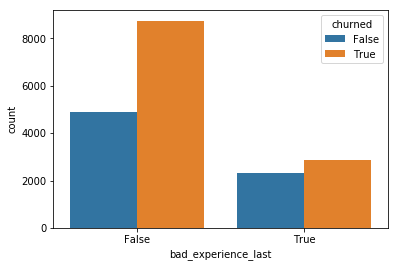

In [19]:
sns.countplot(x="bad_experience_last", hue="churned", data=df18)

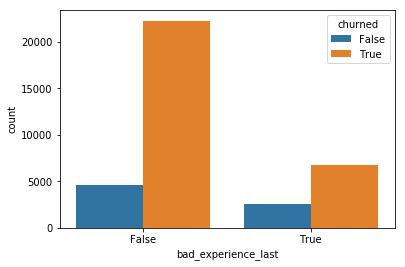

In [62]:
sns.countplot(x="bad_experience_last", hue="churned", data=df3)

In [20]:
df18.groupby('churned')['bad_experience_some'].value_counts()

churned  bad_experience_some
False    True                   5958
         False                  1270
True     True                   7926
         False                  3698
Name: bad_experience_some, dtype: int64

In [63]:
df3.groupby('churned')['bad_experience_some'].value_counts()

churned  bad_experience_some
False    False                   3616
         True                    3479
True     False                  20872
         True                    8107
Name: bad_experience_some, dtype: int64

In [79]:
df18.groupby(['churned', 'bad_experience_last', 'bad_experience_some', 'city'])\
            ['customer_db_id'].nunique().reset_index()\
            .to_csv('./data/pbi_churn.csv', index=False)

In [65]:
df3.groupby(['churned_cluster', 'bad_experience_last', 'bad_experience_some'])\
            ['customer_db_id'].nunique().reset_index()\
            .to_csv('./data/pbi_churn3.csv', index=False)

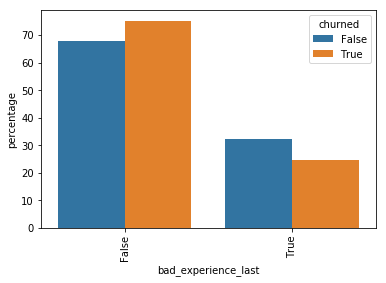

In [22]:
relative_countplot(df18, 'bad_experience_last', 'churned')

In [23]:
df18['good_exp_churned'] = False
df18.loc[df18.churned & ~df18.bad_experience_last, 'good_exp_churned'] = True

In [24]:
df18.good_exp_churned.value_counts()

False    10106
True      8746
Name: good_exp_churned, dtype: int64

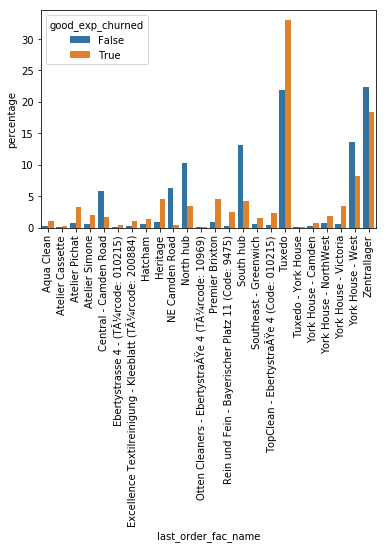

In [25]:
relative_countplot(df18, 'last_order_fac_name', 'good_exp_churned')

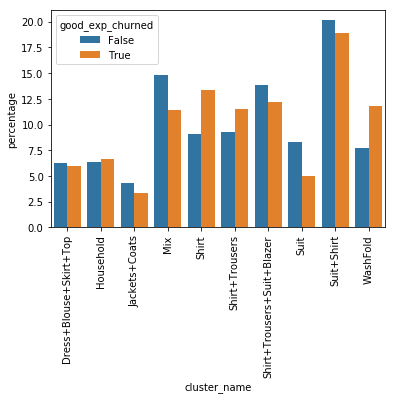

In [26]:
relative_countplot(df18, 'cluster_name', 'good_exp_churned')

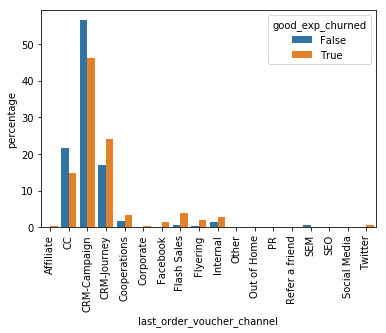

In [27]:
relative_countplot(df18, 'last_order_voucher_channel', 'good_exp_churned')

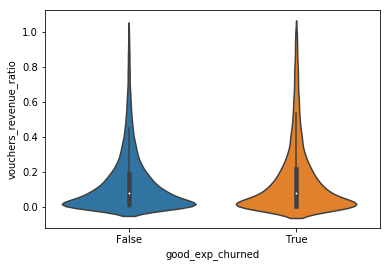

In [28]:
sns.categorical.violinplot(data=df18, x='good_exp_churned', y='vouchers_revenue_ratio')

In [29]:
sorted(df18.columns.tolist())

['Accessories',
 'Android',
 'BUS_Blazer',
 'BUS_Blouse',
 'BUS_Dress',
 'BUS_Evening Dress',
 'BUS_Shirt',
 'BUS_Skirt',
 'BUS_Suit',
 'BUS_Trousers',
 'Before Service Class',
 'CAS_Knitwear',
 'CAS_Shorts',
 'CAS_Top',
 'CAS_Tshirt',
 'CAS_Underwear',
 'CLASSIC',
 'Desktop Web',
 'EXPRESS',
 'HH_blanket',
 'HH_covers',
 'HH_cushions',
 'HH_linens',
 'HH_others',
 'HH_pillow_case',
 'HH_towels',
 'LITE',
 'Mobile Web',
 'NA',
 'OUT_Jackets + Coats',
 'OUT_Skiwear',
 'Others',
 'PERSIL',
 'PLUS',
 'Unnamed: 0',
 'WashFold',
 'aov',
 'avg_rating',
 'bad_experience_last',
 'bad_experience_some',
 'canceled_orders',
 'churn_factor',
 'churn_factor_cluster',
 'churned',
 'churned_cluster',
 'city',
 'cluster',
 'cluster_name',
 'completed_orders',
 'customer_db_id',
 'customer_id',
 'customer_reschedules',
 'early_orders',
 'first_order_date',
 'first_order_fac_name',
 'first_order_products',
 'first_order_rating',
 'first_order_recency',
 'first_order_revenue',
 'first_order_service_class

# Feature Selection

In [30]:
df18['gender'] = df18.gender.fillna('unknown')
df18['last_order_voucher_channel'] = df18.last_order_voucher_channel.fillna('none')
df18['first_order_voucher_channel'] = df18.first_order_voucher_channel.fillna('none')

df18['punctual'] = df18.punctual.fillna(False)
df18['last_order_rescheduled'] = df18.last_order_rescheduled.fillna(False)

In [76]:
keep_cols = [
    # individual
    'gender', 'aov', 'referred', 'last_order_state', 
    'last_order_service_class',  'last_order_software_type', 
    # vouchers
    'vouchers_revenue_ratio', 'first_order_voucher_channel', 
    'last_order_voucher_channel', 'last_order_voucher',
    # revenue
    'last_order_revenue', 'last_order_revenue_diff',
    # recleans
    'reclean_orders', 'last_reclean_order', 'reclean_ratio',
    # reschedules
    'internal_reschedules', 'customer_reschedules',
    'last_order_rescheduled',
    # rating
    'rated_orders', 'avg_rating', 'rated_orders_ratio', 
    'last_order_rating', 'rating_diff',
    # refunds
    'refunds_success', 'refunds_unsuccess', 'last_order_refund_request',
    # pickup 
    'pickup_friday', 'pickup_thursday', 'pickup_wednesday', 'pickup_tuesday', 'pickup_monday',
    'pickup_after_noon', 'pickup_before_noon', 'pickup_early_morning', 'pickup_evening',
    # punctuality
    'late_orders', 'early_orders', 'unpunctual_orders', 'unpunctual_ratio', 'punctual',
    # products
    'cluster',
    # experience
    'bad_experience_some', 'bad_experience_last'
]

In [72]:
keep_cols = [
    # individual
    'last_order_state', 'last_order_service_class',  'last_order_software_type', 
    # vouchers
    'last_order_voucher_channel', 'last_order_voucher',
    # revenue
    'last_order_revenue', 'last_order_revenue_diff',
    # recleans
    'last_reclean_order',
    # reschedules
    'last_order_rescheduled',
    # rating
    'last_order_rating',
    # refunds
    'last_order_refund_request',
    # punctuality
    'punctual',
    # products
    'cluster_name',
    # experience
    'bad_experience_last'
]

In [78]:
df18[keep_cols + ['churned']].corr()['churned'].sort_values()

internal_reschedules        -0.238436
customer_reschedules        -0.195289
rated_orders_ratio          -0.185831
bad_experience_some         -0.157195
rated_orders                -0.133774
last_order_voucher          -0.101461
avg_rating                  -0.083199
bad_experience_last         -0.080134
referred                    -0.075168
last_order_rescheduled      -0.070750
last_order_rating           -0.070083
cluster                     -0.067676
pickup_early_morning        -0.065900
unpunctual_orders           -0.060197
pickup_wednesday            -0.059579
late_orders                 -0.052706
reclean_ratio               -0.048286
reclean_orders              -0.046424
last_order_revenue          -0.039853
unpunctual_ratio            -0.037217
early_orders                -0.036341
pickup_evening              -0.035524
aov                         -0.031202
rating_diff                 -0.030902
punctual                    -0.025568
pickup_monday               -0.019759
refunds_succ

In [33]:
X_df = df18.copy()[keep_cols]

In [34]:
X_df = X_df.fillna(-999)

In [35]:
for col in X_df.select_dtypes(include=['object']):
#     lab_enc = LabelEncoder()
#     lab_enc.fit(X_df[col])
#     X_df[col + '_enc'] = lab_enc.transform(X_df[col].tolist())
#     print(lab_enc.classes_)
#     print(lab_enc.transform(lab_enc.classes_) )

    enc = X_df.groupby(col).size()
    enc = enc/len(X_df)
    X_df[col + '_enc'] = X_df[col].map(enc)
    print(enc.sort_values())
    print()
    
    keep_cols[keep_cols.index(col)] = col + '_enc'

last_order_state
canceled     0.060524
completed    0.939476
dtype: float64

last_order_service_class
PERSIL                  0.002599
CLASSIC                 0.006525
EXPRESS                 0.077817
Before Service Class    0.145343
PLUS                    0.320921
LITE                    0.446796
dtype: float64

last_order_software_type
-999           0.003289
Mobile Web     0.029015
Android        0.126565
Desktop Web    0.182474
iOS            0.658657
dtype: float64

last_order_voucher_channel
SEO               0.000053
Out of Home       0.000053
Refer a friend    0.000106
Other             0.000106
PR                0.000159
Corporate         0.000265
Affiliate         0.000318
Social Media      0.000424
Twitter           0.000583
SEM               0.001114
Facebook          0.001591
Flyering          0.002334
Flash Sales       0.004668
Internal          0.004827
Cooperations      0.005729
CC                0.047740
CRM-Journey       0.049597
CRM-Campaign      0.131657
none      

In [36]:
y_df = df18.churned

# Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## Split train/test

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_df[keep_cols], y_df, test_size=0.1, random_state=0)

In [39]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (16966, 14)
X_test (1886, 14)
y_train (16966,)
y_test (1886,)


In [40]:
y_train.value_counts() / len(y_train)

True     0.61582
False    0.38418
Name: churned, dtype: float64

In [41]:
y_test.value_counts() / len(y_test)

True     0.623542
False    0.376458
Name: churned, dtype: float64

# XGBoost

In [42]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn import tree
from xgboost import to_graphviz

In [43]:
xgb = XGBClassifier(max_depth=4, n_estimators=50)
xgb.fit(X_train, y_train, eval_metric=f1_score, verbose=True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [44]:
xgb.score(X_test, y_test)

0.672322375397667

In [45]:
pd.DataFrame(data=xgb.feature_importances_, index=keep_cols)

,0
last_order_state_enc,0.005626
last_order_service_class_enc,0.167370
last_order_software_type_enc,0.071730
last_order_voucher_channel_enc,0.165963
last_order_voucher,0.000000
last_order_revenue,0.225035
last_order_revenue_diff,0.102672
last_reclean_order,0.007032
last_order_rescheduled,0.015471
last_order_rating,0.047820


In [46]:
dot = to_graphviz(xgb, num_trees=1)
dot.format = 'png'
dot.render("tree")

'tree.png'

# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
lr = LogisticRegression(max_iter=10)

In [50]:
X_train_s = StandardScaler().fit_transform(X_train)
X_test_s = StandardScaler().fit_transform(X_test)

In [51]:
lr.fit(X_train_s, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
f1_score(y_test, lr.predict(X_test_s))

0.7624954396205764

# SVM

In [53]:
from sklearn import svm

In [54]:
s = svm.SVC()

In [55]:
s.fit(X_train_s, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
f1_score(y_test, s.predict(X_test_s))

0.7548313755210307

# Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dt = DecisionTreeClassifier(max_depth=6)

In [59]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [60]:
f1_score(y_test, dt.predict(X_test))

0.7613200306983884

In [61]:
tree.export_graphviz(dt, 'tree_dt.dot', feature_names=keep_cols, class_names=['not churned', 'churned'])